## DataSet set-up

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Target Class:", list(iris.target_names))
print("Dataset Features:",list(iris.feature_names))

Target Class: ['setosa', 'versicolor', 'virginica']
Dataset Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
import pandas as pd
iris_df = pd.DataFrame(iris.data)
iris_df = pd.concat((iris_df, pd.DataFrame(iris.target)), axis=1)
iris_df.columns = iris.feature_names + ["target"]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Let's meet our data!

In [5]:
## Info summary (data types, memory usage, global missigness)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris_df.describe(include ='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Basic missigness processing

In [0]:
# === Check if train_data contains a column that is null === #
if not iris_df.apply(pd.Series).isnull().values.all(axis=0).sum() == 0:
    raise ValueError("There are Null columns in the train data")

In [10]:
# === Drop columns which contain missing value,  If all values are NA  === #
print("our training data shape before: ",iris_df.shape)
iris_df = iris_df.dropna(axis=1, how= "all")
print("our training data shape after: ",iris_df.shape)

our training data shape before:  (150, 5)
our training data shape after:  (150, 5)


In [11]:
# === Check if train_data contains two observations with the exact same data === #
print(iris_df.shape)
Features = iris_df.columns.drop("target")
iris_df = iris_df.drop_duplicates(subset=Features, keep='first')
print(iris_df.shape)

(150, 5)
(149, 5)


In [15]:
# === Eliminating all the features that are constant on the training set === #
print ("Before: Train dataset has {0} rows and {1} columns".format(iris_df.shape[0], iris_df.shape[1]))
print ("\n The following features will be removed:", \
 iris_df.columns.values[list(np.nonzero(iris_df.apply(pd.Series.nunique) == 1)[0])]\
     )
iris_df = iris_df.loc[:,iris_df.apply(pd.Series.nunique) != 1]
print ("\nAfter:  Train dataset has {0} rows and {1} columns".format(iris_df.shape[0], iris_df.shape[1]))

Before: Train dataset has 149 rows and 5 columns

 The following features will be removed: []

After:  Train dataset has 149 rows and 5 columns


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


## Visualizing missingness

<Figure size 720x360 with 0 Axes>

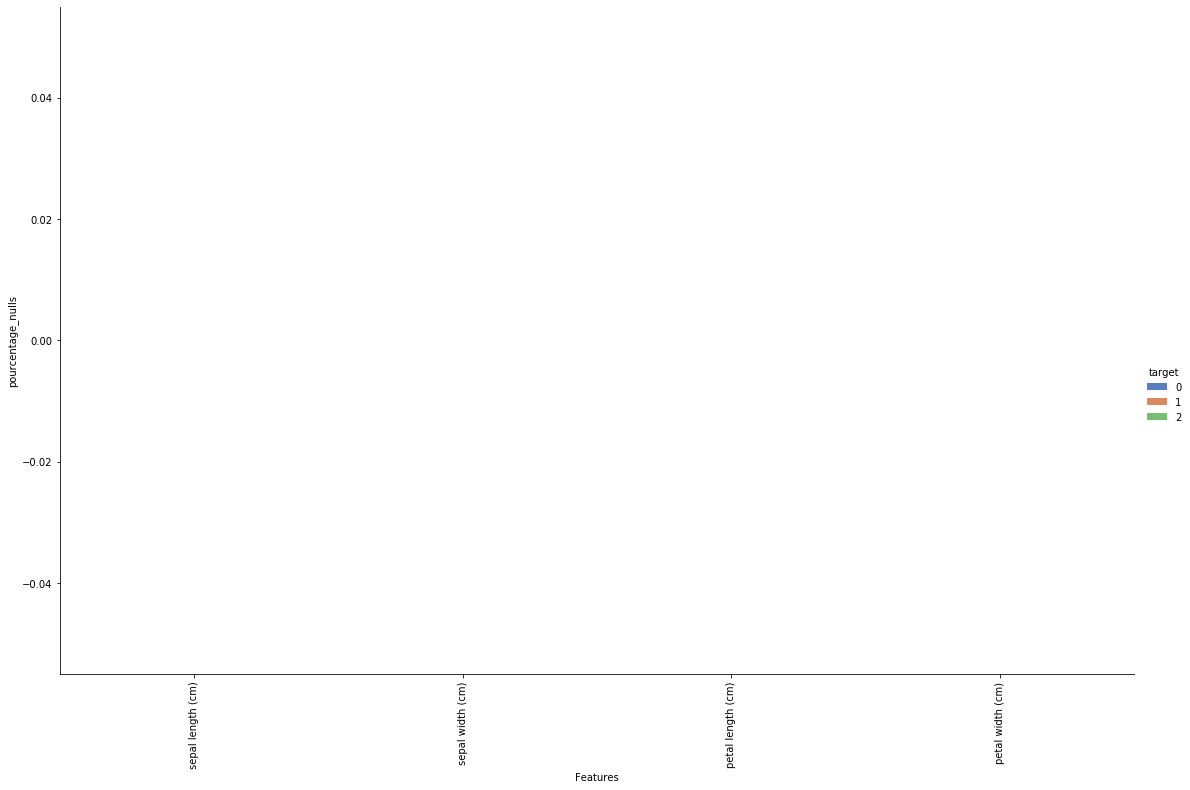

In [21]:
# we'll take a first look at our features 
this_df = iris_df
this_df = (100 * iris_df.set_index('target').isna().sum(level=0)/len(iris_df)).T
this_df = this_df.reset_index()
this_df = pd.melt(this_df, id_vars=['index'], var_name="target", value_name="pourcentage_nulls")
this_df.columns = ['Features', 'target', "pourcentage_nulls" ]
this_df = this_df.reset_index()
this_df.columns
this_df["index"]= this_df.index

plt.figure(figsize=(10,5))
chart = sns.catplot(
    x="Features", 
    y="pourcentage_nulls", 
    hue="target", 
    data=this_df[this_df['Features'].str.contains("cm")], #visualize by features family
    height=10, kind="bar", palette="muted", aspect=16/10)

#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
for ax in chart.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)